In [29]:
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import FinanceDataReader as fdr

df_krx = fdr.StockListing('KRX')
print(len(df_krx))
df_krx.head()

2873


,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,57300,3,0,0.00,56600,57600,56500,5239637,298255743000,342068540115000,5969782550,STK
1,000660,KR7000660001,SK하이닉스,KOSPI,,199600,2,-5400,-2.63,199800,201000,199200,1182761,236301000300,145309272054000,728002365,STK
2,373220,KR7373220003,LG에너지솔루션,KOSPI,,376500,2,-9000,-2.33,386000,386000,375000,56632,21455577000,88101000000000,234000000,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,1195000,1,44000,3.82,1142000,1197000,1140000,52245,61720167000,85052930000000,71174000,STK
4,005380,KR7005380001,현대차,KOSPI,,203500,2,-3500,-1.69,205000,205000,203500,162950,33294234500,42616194868500,209416191,STK


In [30]:
df_KOSPI = fdr.DataReader('KS11', '2024')   # KOSPI
df_Target = fdr.DataReader('005930', '2024')  # Target 종목 : 삼성전자

df_KOSPI.head(10)

1 001 2024-01-01 00:00:00 2025-12-31 00:00:00


,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2024-01-02,2645.47,2675.80,2641.88,2669.81,409871688,0.0055,1,14.53,9628190129018,2147223894556881
2024-01-03,2643.54,2643.72,2607.31,2607.31,463131608,-0.0234,2,-62.50,10121578328315,2096573473823721
2024-01-04,2592.44,2602.64,2580.09,2587.02,770176172,-0.0078,2,-20.29,8992273956601,2081862659594752
2024-01-05,2586.89,2592.29,2572.60,2578.08,522289892,-0.0035,2,-8.94,8384472928787,2075148802709824
2024-01-08,2584.23,2591.68,2566.34,2567.82,320143990,-0.0040,2,-10.26,6763632029996,2067290656237408
2024-01-09,2598.31,2599.37,2556.00,2561.24,791214273,-0.0026,2,-6.58,8896714487368,2061575745648289
2024-01-10,2563.97,2568.19,2539.82,2541.98,570021066,-0.0075,2,-19.26,8795834820834,2045533566125824
2024-01-11,2543.03,2557.30,2540.27,2540.27,788422596,-0.0007,2,-1.71,13669889824902,2043896294511727
2024-01-12,2536.55,2543.83,2517.76,2525.05,790177187,-0.0060,2,-15.22,8368765827550,2047248114238733


In [31]:
# 동일 카테고리에서 비교군의 설정
object = ['KS11', '105560', '316140', '086790', '024110']    # 금융지주사 비교

for i in range(len(object)):
    print(str(df_krx[df_krx['Code'] == object[i]]['Name'].values).replace('\'', ''))

# plot legend에 한글 문자열 전달 시 발생하는 기호 제거 방법 (250221) 
result = []

for i in range(len(object)):
    result.append(str(df_krx[df_krx['Code'] == object[i]]['Name'].values).replace('\'', '').replace('[', '').replace(']', ''))

result


[]
[KB금융]
[우리금융지주]
[하나금융지주]
[기업은행]


['', 'KB금융', '우리금융지주', '하나금융지주', '기업은행']

In [32]:
# plot에서 한글 폰트 깨짐 문제

import platform

os = platform.system()

# Win
if os == 'Windows':
    plt.rc('font', family = 'Malgun Gothic')

# Mac
elif os == 'Darwin':
    plt.rc('font', family = 'AppleGothic')

In [33]:
# ARIMA 함수 형태로 정의 - 반복 사용

def cal_residuals(code):
    df = fdr.DataReader(code, '2024')
    series_df = df['Change'].values
    model = ARIMA(series_df, order = (5, 1, 0))
    model_fit = model.fit()
    residuals = DataFrame(model_fit.resid)

    return residuals

1 001 2024-01-01 00:00:00 2025-12-31 00:00:00


c:\Users\wonta\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\wonta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


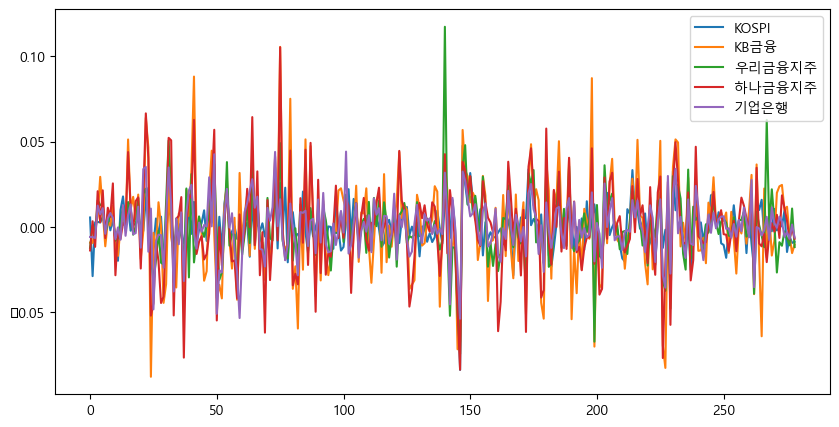

In [34]:
plt.figure(figsize=(10, 5))
ax = plt.gca()

for i in range(len(object)):
    cal_residuals(object[i]).plot(label=object[i], ax=ax)  # 여러 개 중첩

[result[i] for i in range(len(result))]   # legend 리스트 만들기
result[0] = 'KOSPI'    # 공란 처리된 첫번째 칸에 KOSPI 텍스트 입력
plt.legend(result)

plt.show()

1 001 2024-01-01 00:00:00 2025-12-31 00:00:00


c:\Users\wonta\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\wonta\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


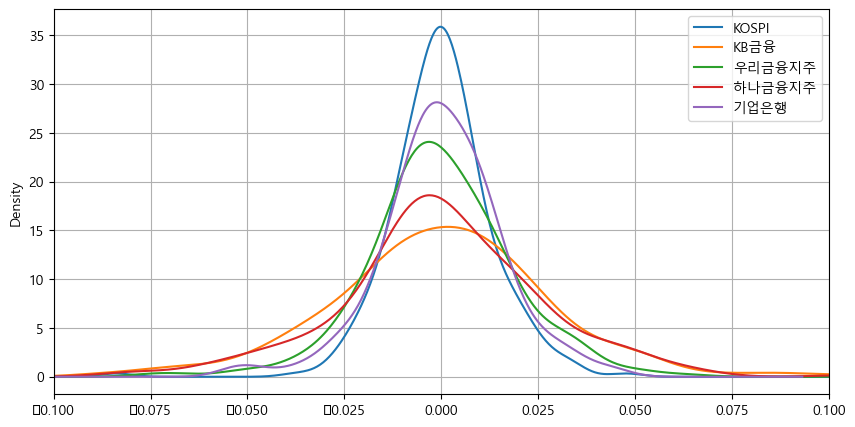

In [35]:
plt.figure(figsize=(10, 5))
ax = plt.gca()


for i in range(len(object)):
    cal_residuals(object[i]).plot(kind = 'kde', label=object[i], ax=ax)

plt.xlim(-0.1, 0.1)    # 표시 영역을 -10%~+10% 으로 지정

plt.legend(result)
plt.grid(True)

plt.show()

In [36]:
# 동일 카테고리 종목의 KDE 비교를 통하여 분석 기간 동안의 변동 특성을 확인할 수 있다.
# KOSPI 지수와의 비교하여 종목의 안정성을 판단하는 기준으로 사용할 수 있으며,
# 금융지주 회사의 분석 건의 경우, 비슷한 배당 수준을 보이는 종목의 경우,
# 안정성을 추구하는 투자자를 위한 종목 선택의 기준으로 사용할 수 있을 것이다.

In [37]:
# 상세한 변동을 확인할 필요 있음
# 기간 중 최고값을 기준으로 변동 값의 비율을 시계열로 표현

def cal_value(code):
    df = fdr.DataReader(code, '2024')
    series_df = df['Close'].values/max(df['Close'])
    cal_vals = DataFrame(series_df)
    return cal_vals

1 001 2024-01-01 00:00:00 2025-12-31 00:00:00


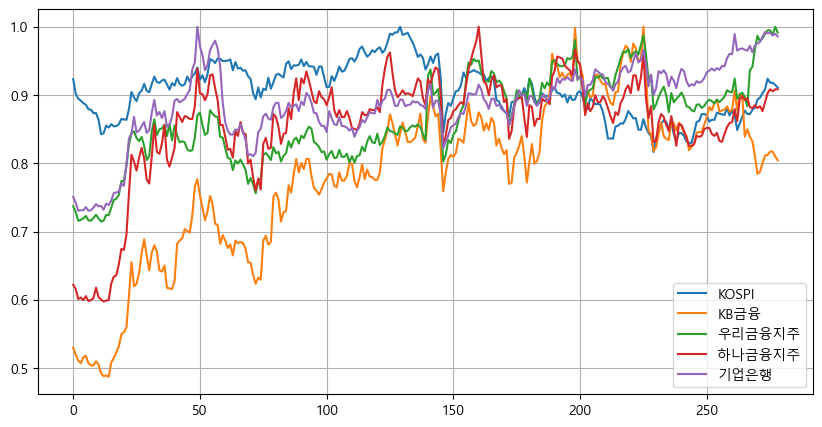

In [39]:
plt.figure(figsize=(10, 5))
ax = plt.gca()


for i in range(len(object)):
    cal_value(object[i]).plot(label=object[i], ax=ax)

plt.legend(result)
plt.grid(True)

plt.show()